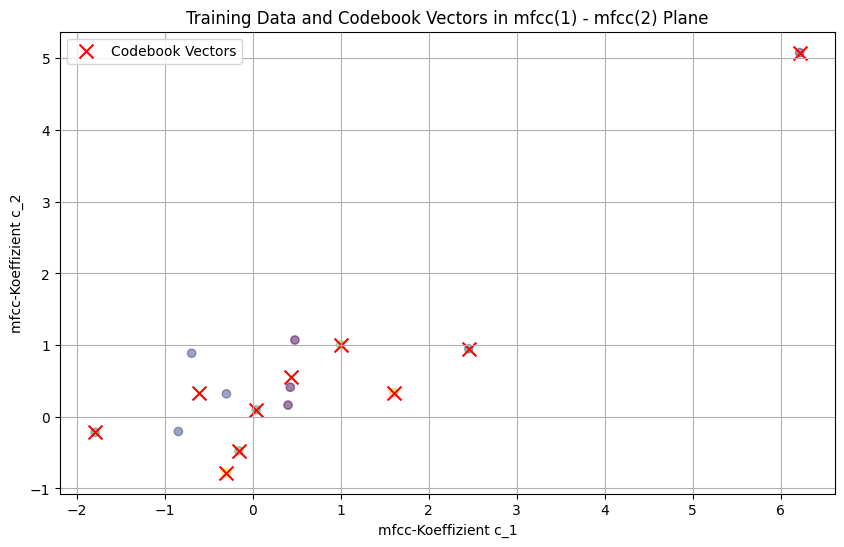

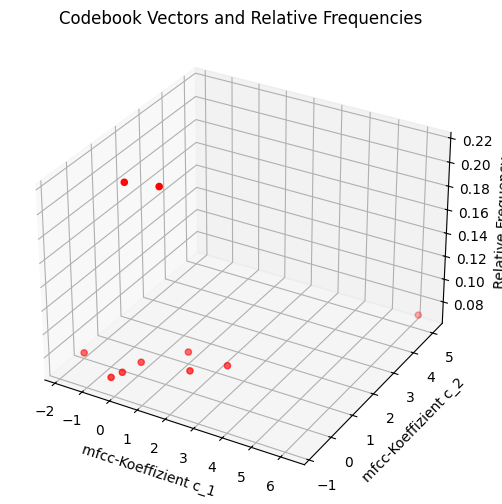

Recognized Sounds: ['a', 'm', 'a', 'u', 'u', 'm', 'a', 'm', 'a', 'a']


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Auslesen der xlsx
file_path = 'mfcc_db.xlsx'
data = pd.read_excel(file_path, header=None)

# Auslesen der Koeffizienten
mfcc_data = data.iloc[:, :13].values
labels = data.iloc[:, 13].values

# 1
K = 10
kmeans = KMeans(n_clusters=K, random_state=42).fit(mfcc_data)
codebook_vectors = kmeans.cluster_centers_
codebook_labels = kmeans.labels_

# Speichern der Codebook Vektoren
codebook_df = pd.DataFrame(codebook_vectors, columns=[f'mfcc{i+1}' for i in range(13)])
codebook_df.to_csv('codebook_vectors.csv', index=False)

plt.figure(figsize=(10, 6))
plt.scatter(mfcc_data[:, 0], mfcc_data[:, 1], c=codebook_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(codebook_vectors[:, 0], codebook_vectors[:, 1], color='red', marker='x', s=100, label='Codebook Vectors')
plt.xlabel('mfcc-Koeffizient c_1')
plt.ylabel('mfcc-Koeffizient c_2')
plt.legend()
plt.title('Training Data and Codebook Vectors in mfcc(1) - mfcc(2) Plane')
plt.grid(True)
plt.show()

# 2
unique, counts = np.unique(codebook_labels, return_counts=True)
relative_frequencies = counts / len(codebook_labels)

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(codebook_vectors[:, 0], codebook_vectors[:, 1], relative_frequencies, c='r', marker='o')
ax.set_xlabel('mfcc-Koeffizient c_1')
ax.set_ylabel('mfcc-Koeffizient c_2')
ax.set_zlabel('Relative Frequency')
plt.title('Codebook Vectors and Relative Frequencies')
plt.show()

# 3
def assign_codebook_vector(input_vector, codebook_vectors):
    distances = np.linalg.norm(codebook_vectors - input_vector, axis=1)
    return np.argmin(distances)

# 4
label_mapping = {0: 'a', 1: 'e', 2: 'f', 3: 'i', 4: 'l', 5: 'm', 6: 'n', 7: 'o', 8: 's', 9: 'u'}
codebook_to_label = {i: label_mapping[i] for i in range(10)}
assigned_labels = [codebook_to_label[assign_codebook_vector(mfcc_data[i], codebook_vectors)] for i in range(len(mfcc_data))]

# Output the results
output_df = pd.DataFrame({'Original Label': labels, 'Assigned Label': assigned_labels})
output_df.to_csv('assigned_labels.csv', index=False)

# 5
def recognize_sound(input_mfcc, codebook_vectors, codebook_to_label):
    codebook_index = assign_codebook_vector(input_mfcc, codebook_vectors)
    return codebook_to_label[codebook_index]

new_mfcc_data = np.random.randn(10, 13)  

recognized_sounds = [recognize_sound(new_mfcc_data[i], codebook_vectors, codebook_to_label) for i in range(new_mfcc_data.shape[0])]
print("Recognized Sounds:", recognized_sounds)


### Welcher Wert für K
Für die Wahl des Werts von \( K \) im K-Means-Algorithmus wird in der Regel die Anzahl der Cluster so gewählt, dass sie die zugrunde liegenden Kategorien oder Muster in den Daten repräsentiert. In Ihrem Fall gibt es 10 verschiedene Laute (a, e, f, i, l, m, n, o, s, u). Daher ist es sinnvoll, \( K = 10 \) zu wählen, um jedem Laut einen eigenen Cluster im Codebook zuzuordnen. Dies ermöglicht eine klare Trennung und Identifizierung der verschiedenen Laute auf Basis der Mel-Cepstren.


### Ergebnis Interpretation (Aufgabe 2)
Die relative Anzahl der Trainingsvektoren pro Voronoi-Bereich zeigt, wie häufig jeder Laut vorkommt und wie gut er von den anderen Lauten unterscheidbar ist. Ein 3-dimensionaler Plot der Codebook-Vektoren und der Häufigkeit kann Cluster unterschiedlicher Größe und Dichte sichtbar machen, was auf die Varianz und Häufigkeit der jeweiligen Laute hinweist. Diese Visualisierung hilft, Muster in den Daten zu erkennen und die Effektivität der Lauttrennung zu bewerten.
